In [1]:
import os
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import math
import tensorflow as tf
sc = MinMaxScaler(feature_range=(0,1)) #normalisasi dari 0 - 1

In [5]:
def view_loss_accuracy_history(history,nama):
  #Melihat plot evaluasi model
  plt.figure(figsize=(15,6))
  plt.plot(history.history['loss'])
  plt.plot(history.history['accuracy'])
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Riwayat Train ' + nama)
  plt.savefig('result_check_final/'+nama+'_train_history.png')
  #plt.show()

def data_clean(path_data):
  df = pd.read_csv(path_data)
  df = df.drop('Unnamed: 0', axis=1)
  df = df.sort_values('date', ascending=True)
  df.set_index('date', inplace=True)
  return df
  

def predict(df, timesteps, model):
  df_to_train = df[:485] #data train
  df_to_test = df[485:] #data test
  data_total= pd.concat([df_to_train['close'], df_to_test['close']],  axis=0) #digabungin
  #inputnya dimulai dari total data dikurang data test dikurang timestep (jadi dikurang 30 hari sebelum data terbaru dari data train)
  inputs= data_total[len(data_total)-len(df_to_test)-timesteps:].values
  inputs = inputs.reshape(-1,1)
  inputs = sc.fit_transform(inputs)

  x_test = [] #loop dari 30 dengan ukuran data yang 485 - 30 = 455 itu
  for i in range(timesteps, inputs.shape[0]):
    x_test.append(inputs[i-timesteps:i, 0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
  predict = model.predict(x_test)
  predict = sc.inverse_transform(predict)
  return predict

def view_result(pred_res, test_set, model_name):
  plt.figure(figsize=(15,8))
  plt.plot(test_set, color='red', label='Harga Sebenarnya Saham ')
  plt.plot(pred_res, color='blue', label='Harga Prediksi Saham ')
  plt.title('Prediksi Harga Saham '+model_name, fontsize=20)
  plt.xlabel('Waktu', fontsize=15)
  plt.ylabel('Harga Saham ', fontsize=15)
  plt.legend()
  plt.savefig('model_check_semifinal/'+model_name+'_train_history.png')
  #plt.show()

In [6]:
list_asii = []
list_amrt = []
list_untr = []
list_unvr = []
list_mapi = []
list_inkp = []
list_intp = []
list_aces = []
list_sido = []
list_hrum = []

In [7]:
path_dir = "data_plus_mei"
list_file = os.listdir(path_dir)
list_file



['ACES2201-2405.csv',
 'AMRT2201-2405.csv',
 'ASII2201-2405.csv',
 'HRUM2201-2405.csv',
 'INKP2201-2405.csv',
 'INTP2201-2405.csv',
 'MAPI2201-2405.csv',
 'SIDO2201-2405.csv',
 'UNTR2201-2405.csv',
 'UNVR2201-2405.csv']

In [8]:
asii_data = path_dir+"/"+list_file[2]
amrt_data = path_dir+"/"+list_file[1]
untr_data = path_dir+"/"+list_file[8]
unvr_data = path_dir+"/"+list_file[9]
mapi_data = path_dir+"/"+list_file[6]
inkp_data = path_dir+"/"+list_file[4]
intp_data = path_dir+"/"+list_file[5]
aces_data = path_dir+"/"+list_file[0]
sido_data = path_dir+"/"+list_file[7]
hrum_data = path_dir+"/"+list_file[3]

In [9]:
list_data = [asii_data, amrt_data, untr_data, unvr_data, mapi_data, inkp_data, intp_data, aces_data, sido_data, hrum_data]
model_path_dir = "D:\TA\PL\main_train_code\model_final"
list_model = os.listdir(model_path_dir)
list_saham = ['asii', 'amrt', 'untr', 'unvr', 'mapi', 'inkp', 'intp', 'aces', 'sido', 'hrum']

In [10]:
len(list_model)

10

Text(0.5, 1.0, 'Riwayat Harga Penutupan pada Semua Emiten ')

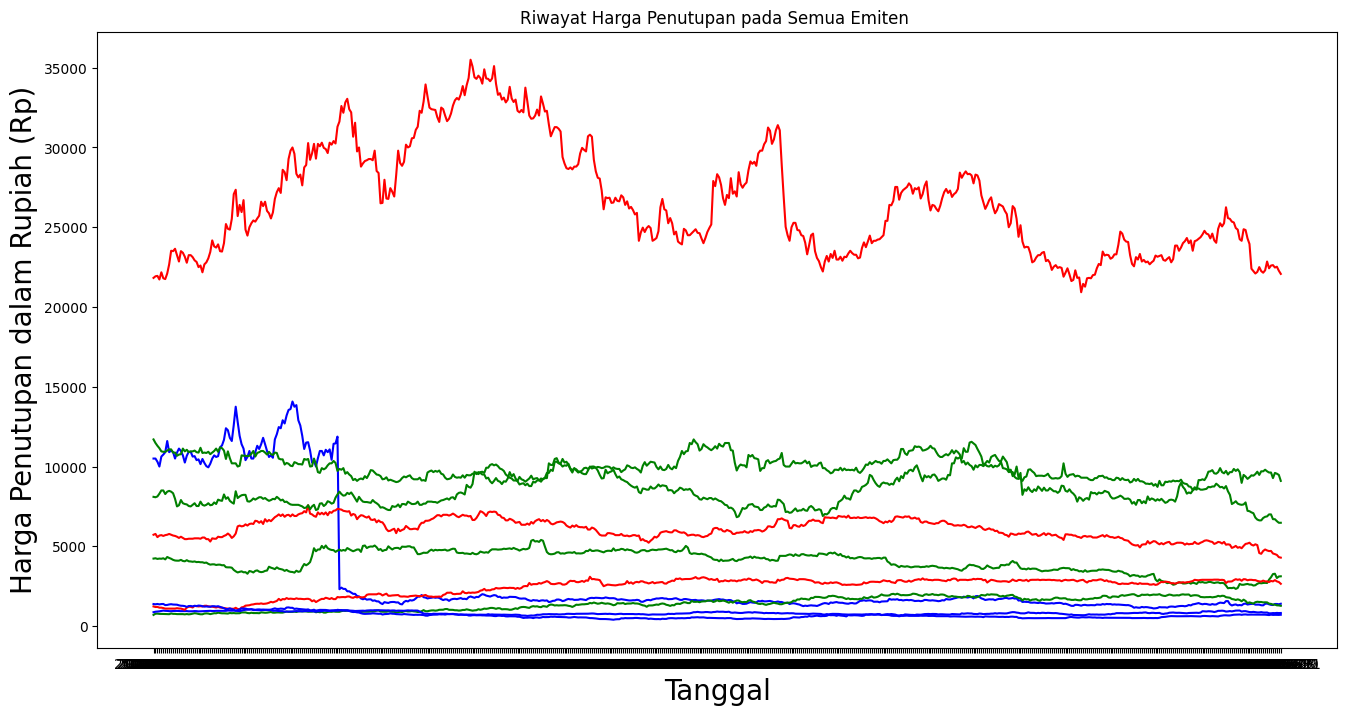

In [36]:
df_hrum = data_clean(hrum_data)
df_asii = data_clean(asii_data)
df_amrt = data_clean(amrt_data)
df_sido = data_clean(sido_data)
df_unvr = data_clean(unvr_data)
df_untr = data_clean(untr_data)
df_inkp = data_clean(inkp_data)
df_intp = data_clean(intp_data)
df_mapi = data_clean(mapi_data)
df_aces = data_clean(aces_data)

plt.figure(figsize=(16,8))
plt.plot(df_hrum['close'], color='blue', label='Harga HRUM ')
plt.plot(df_asii['close'], color='red', label='Harga ASII ')
plt.plot(df_untr['close'], color='red', label='Harga HRUM ')
plt.plot(df_unvr['close'], color='green', label='Harga ASII ')
plt.plot(df_intp['close'], color='green', label='Harga HRUM ')
plt.plot(df_inkp['close'], color='green', label='Harga ASII ')
plt.plot(df_mapi['close'], color='green', label='Harga HRUM ')
plt.plot(df_sido['close'], color='blue', label='Harga ASII ')
plt.plot(df_amrt['close'], color='red', label='Harga HRUM ')
plt.plot(df_aces['close'], color='blue', label='Harga ASII ')
plt.xlabel('Tanggal', fontsize=20)
plt.ylabel('Harga Penutupan dalam Rupiah (Rp)', fontsize=20)
plt.title('Riwayat Harga Penutupan pada Semua Emiten ')

In [11]:
for model_name in list_model:
    for saham in list_saham:
        if(saham in model_name):
            if(saham == 'asii'):
                list_asii.append(model_name)
            elif(saham == 'amrt'):
                list_amrt.append(model_name)
            elif(saham == 'untr'):
                list_untr.append(model_name)
            elif(saham == 'unvr'):
                list_unvr.append(model_name)
            elif(saham == 'mapi'):
                list_mapi.append(model_name)
            elif(saham == 'inkp'):
                list_inkp.append(model_name)
            elif(saham == 'intp'):
                list_intp.append(model_name)
            elif(saham == 'aces'):
                list_aces.append(model_name)
            elif(saham == 'sido'):
                list_sido.append(model_name)
            elif(saham == 'hrum'):
                list_hrum.append(model_name)

           

In [12]:
list_model_saham =[list_asii, list_amrt, list_untr, list_unvr, list_mapi, list_inkp, list_intp, list_aces, list_sido, list_hrum]

In [13]:
df = data_clean(list_data[0])
df[560:]

,stock_code,prev,open,high,low,close,change
date,,,,,,,
2024-05-02,ASII,5150,5225,5275,5175,5175,25
2024-05-03,ASII,5175,5225,5250,5200,5225,50
2024-05-06,ASII,5225,5250,5250,5075,5100,-125
2024-05-07,ASII,5100,5100,5125,5025,5050,-50
2024-05-08,ASII,5050,5075,5150,5000,5125,75
2024-05-13,ASII,5125,5150,5175,5075,5075,-50
2024-05-14,ASII,5075,4680,4690,4580,4580,-495
2024-05-15,ASII,4580,4570,4620,4530,4530,-50
2024-05-16,ASII,4530,4590,4720,4540,4710,180


asii

asii_1_100_0.2_100_8_30.h5
3/3 [==============================] - 2s 20ms/step
18 18
amrt
amrt_1_300_0_100_8_7.h5
3/3 [==============================] - 1s 18ms/step
18 18
untr
untr_1_100_0.2_100_8_30.h5
3/3 [==============================] - 2s 27ms/step
18 18
unvr
unvr_1_100_0.2_100_8_30.h5
3/3 [==============================] - 1s 27ms/step
18 18
mapi
mapi_1_100_0_200_8_30.h5
3/3 [==============================] - 1s 26ms/step
18 18
inkp
inkp_1_100_0_200_32_7.h5
3/3 [==============================] - 1s 10ms/step
18 18
intp
intp_1_100_0.2_100_32_30.h5
3/3 [==============================] - 1s 25ms/step
18 18
aces
aces_5_100_0_100_8_30.h5
3/3 [==============================] - 3s 63ms/step
18 18
sido
sido_1_300_0_100_8_7.h5
3/3 [==============================] - 1s 18ms/step
18 18
hrum
hrum_1_100_0_100_8_7.h5
3/3 [==============================] - 1s 10ms/step
18 18


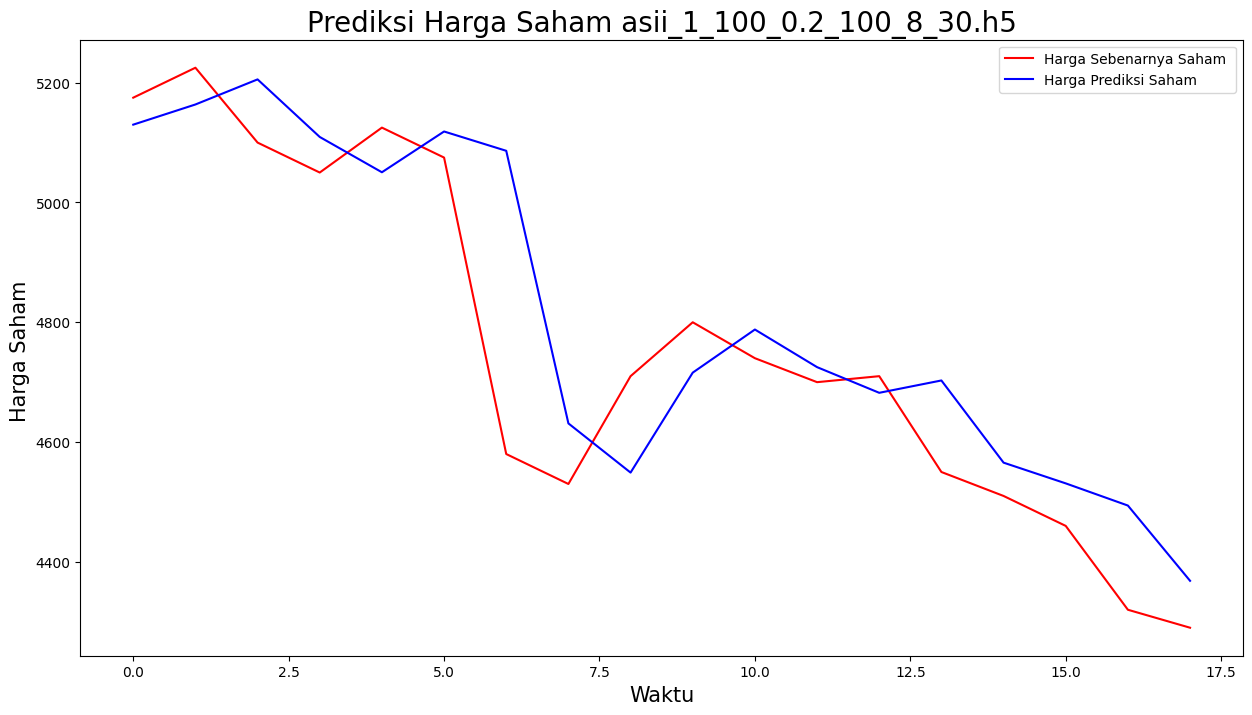

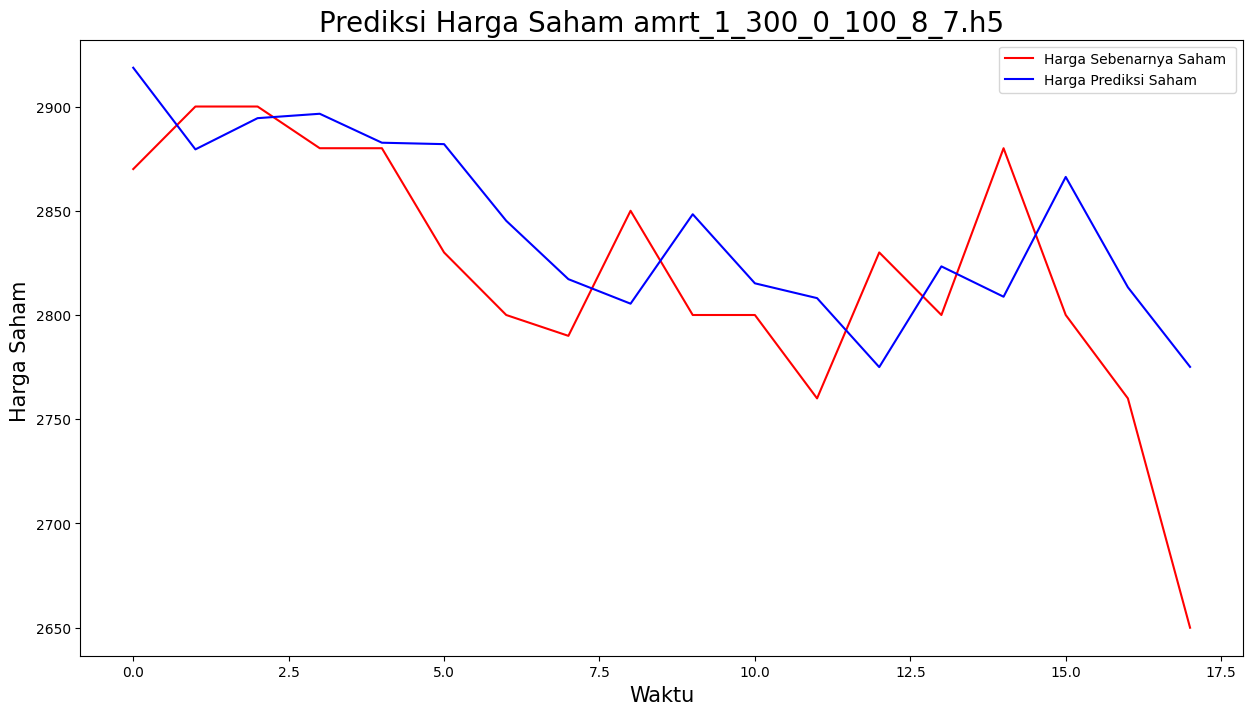

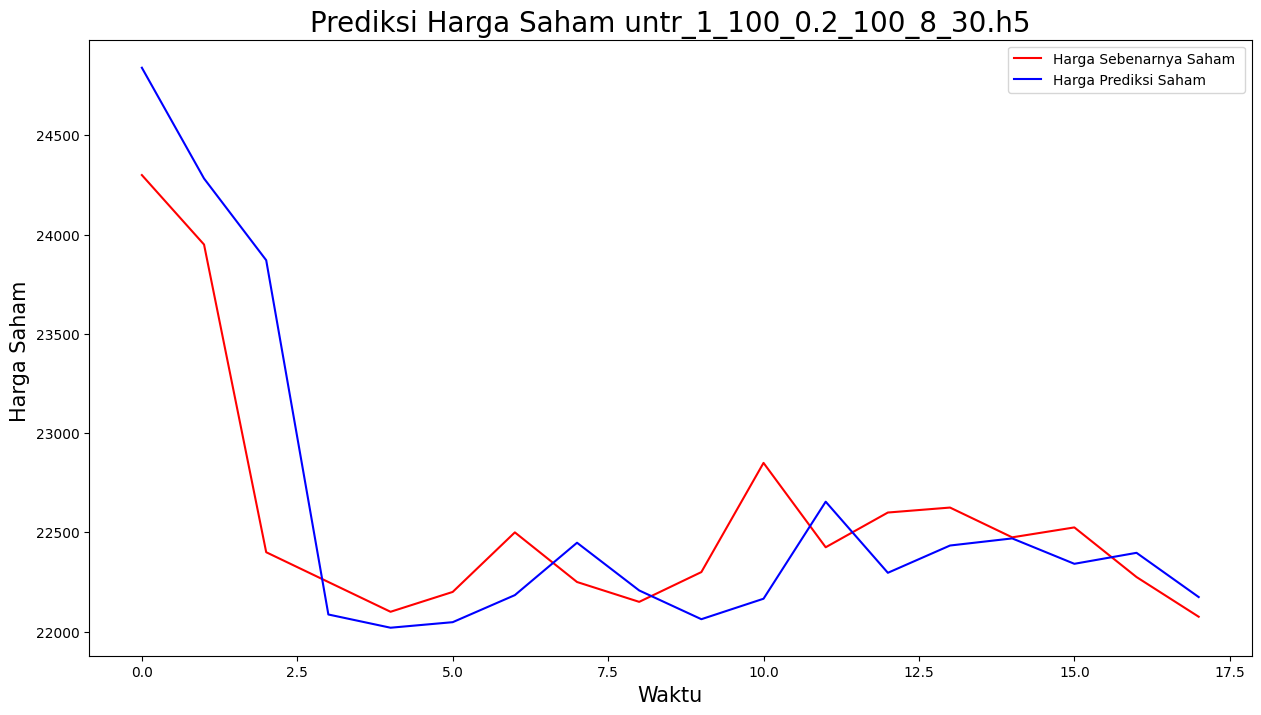

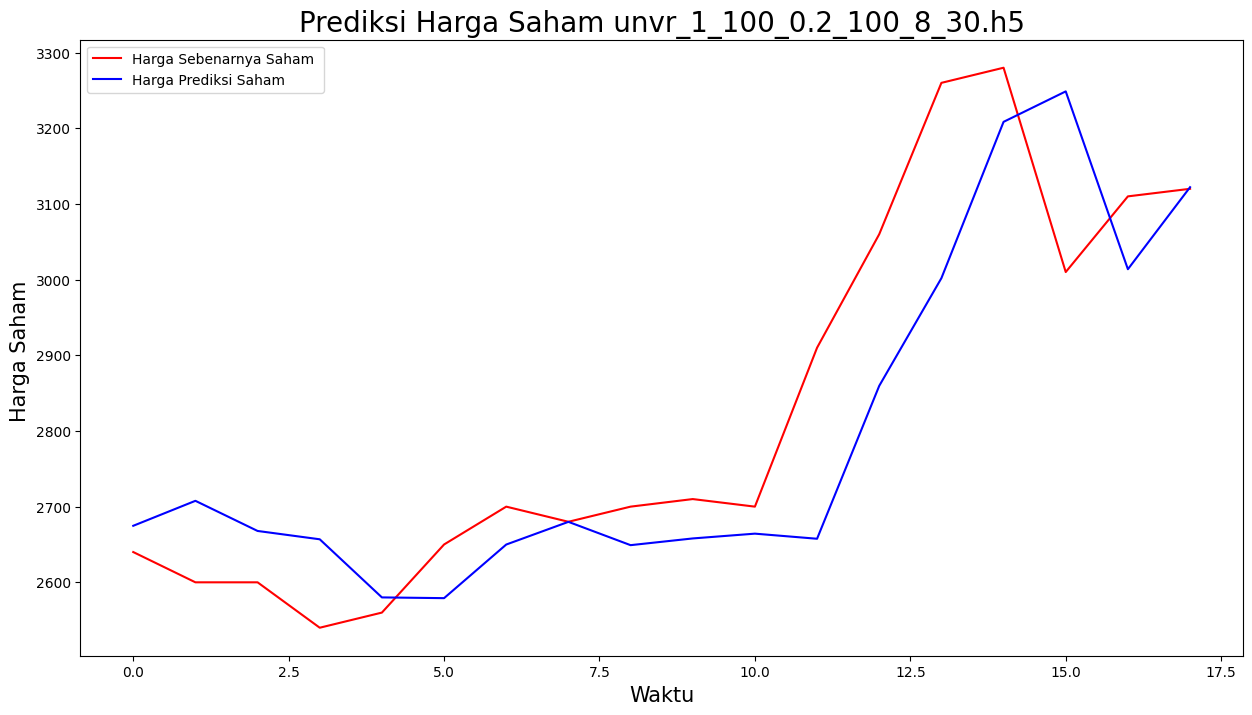

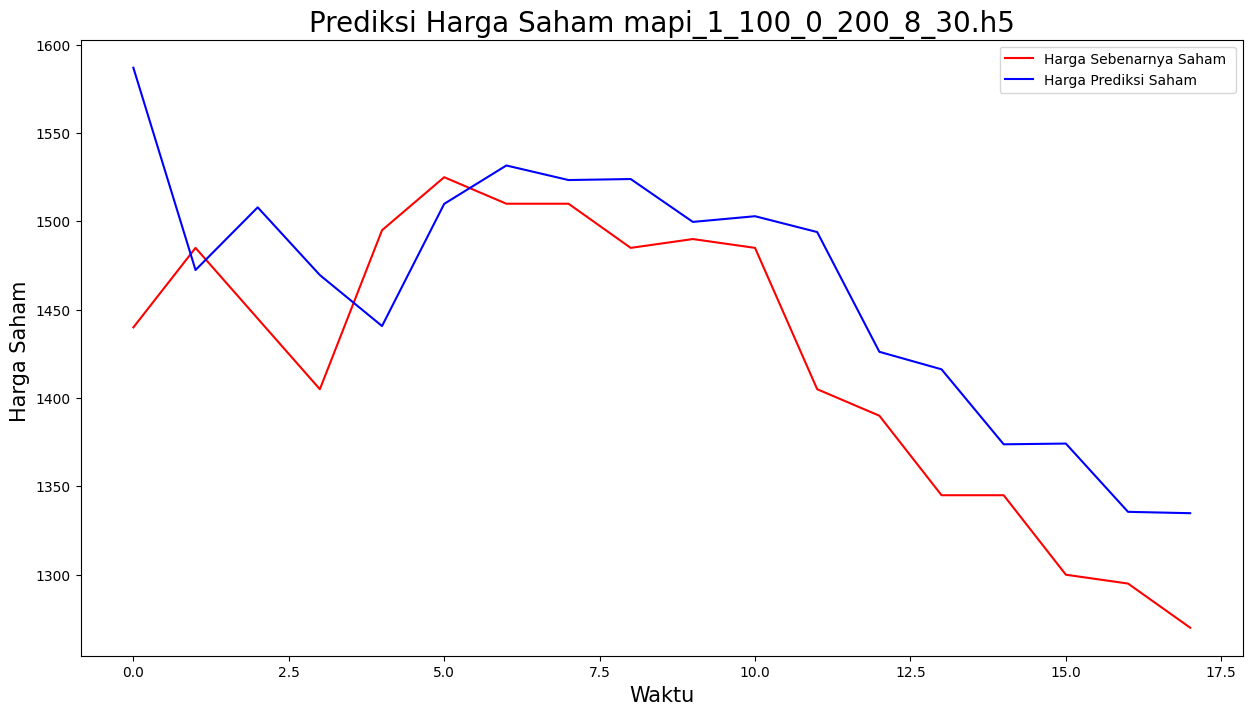

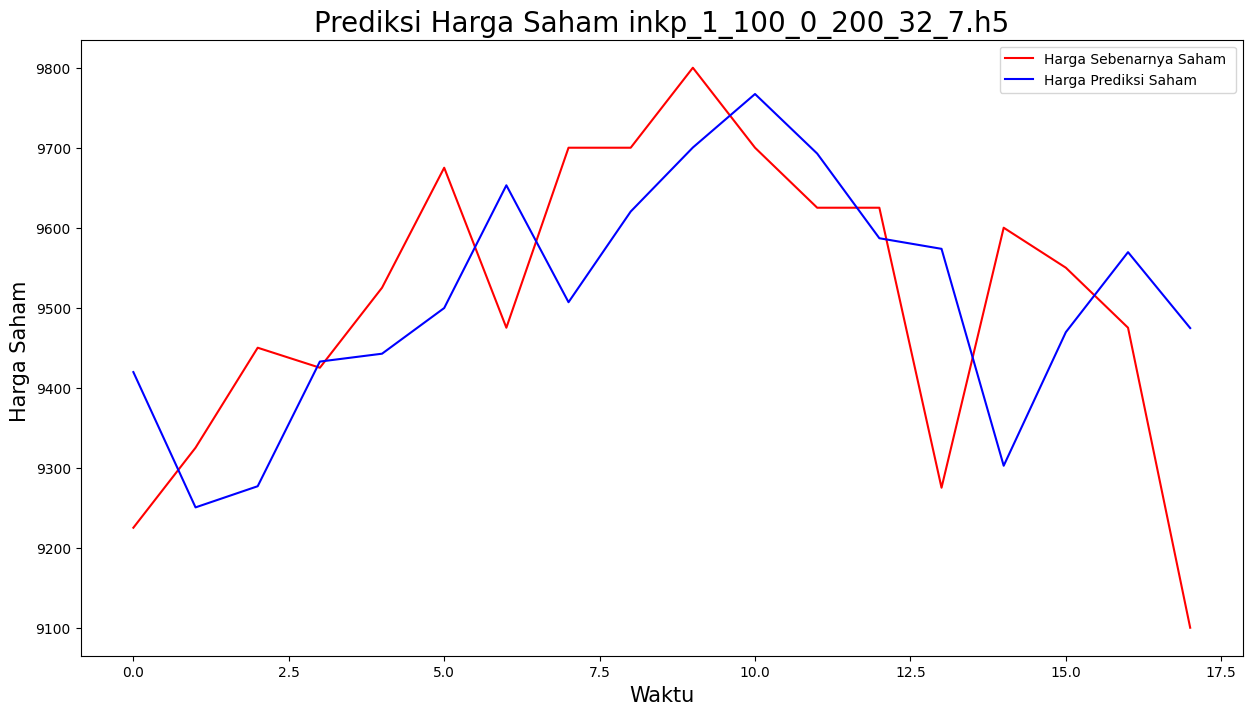

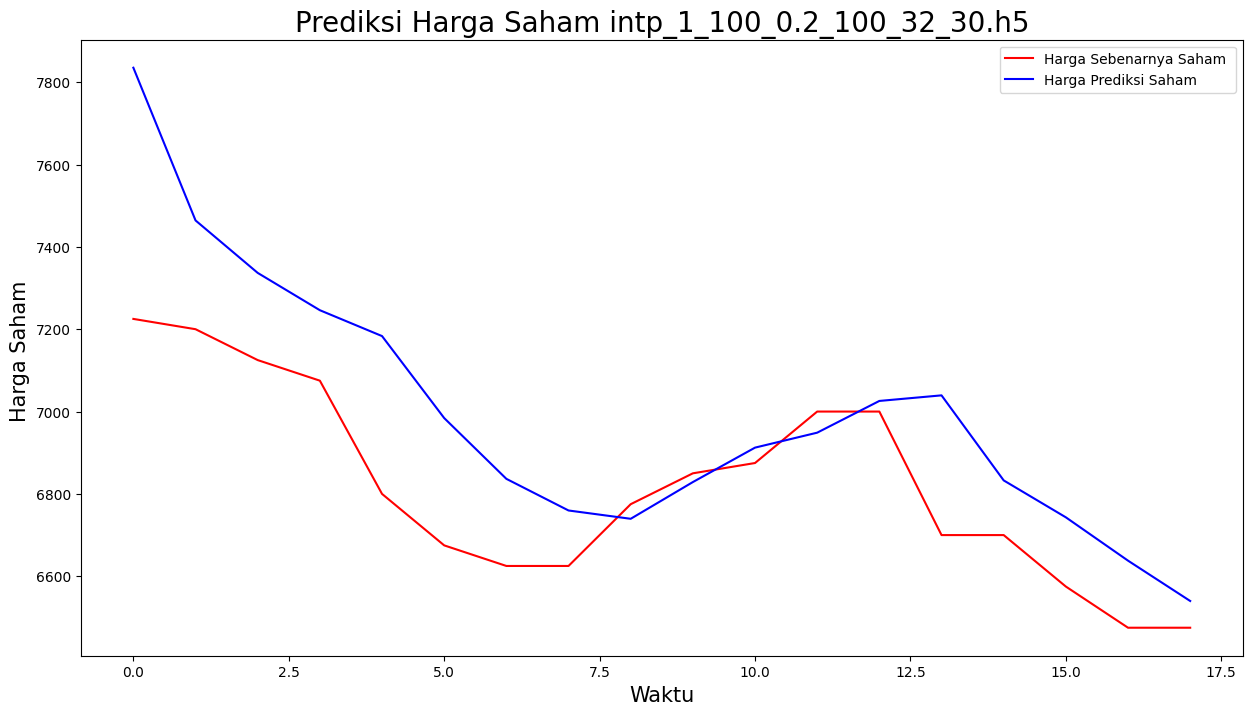

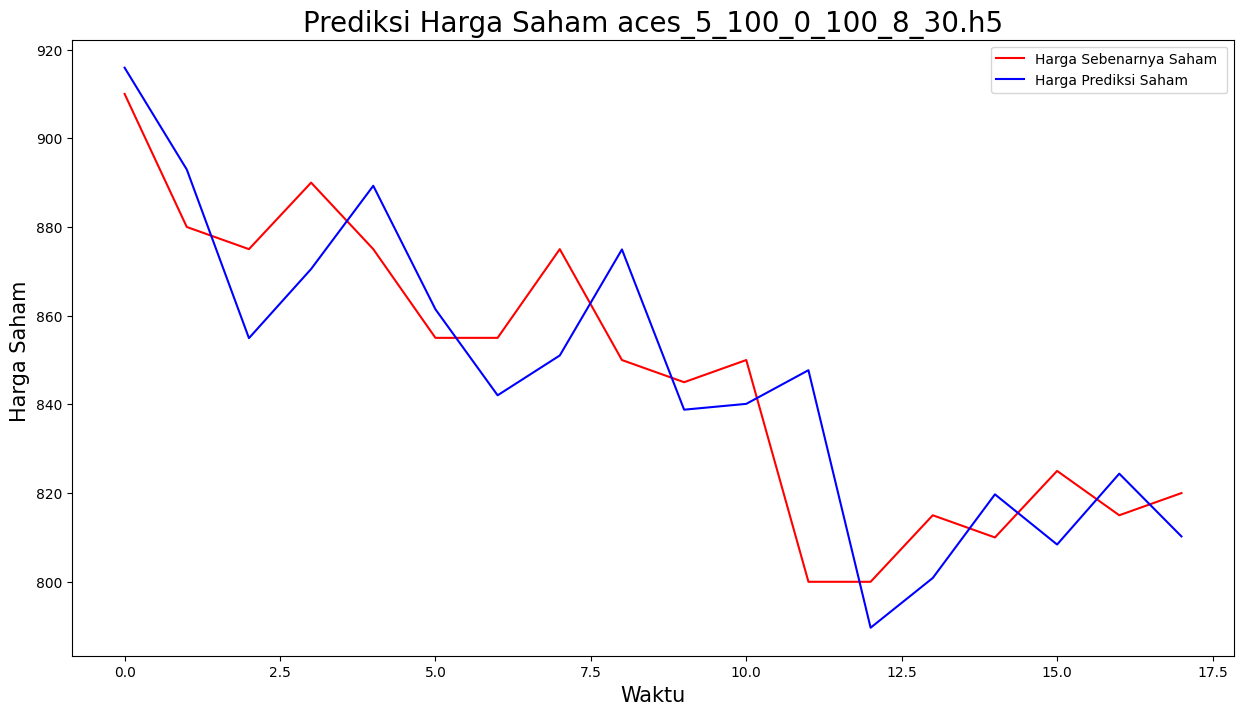

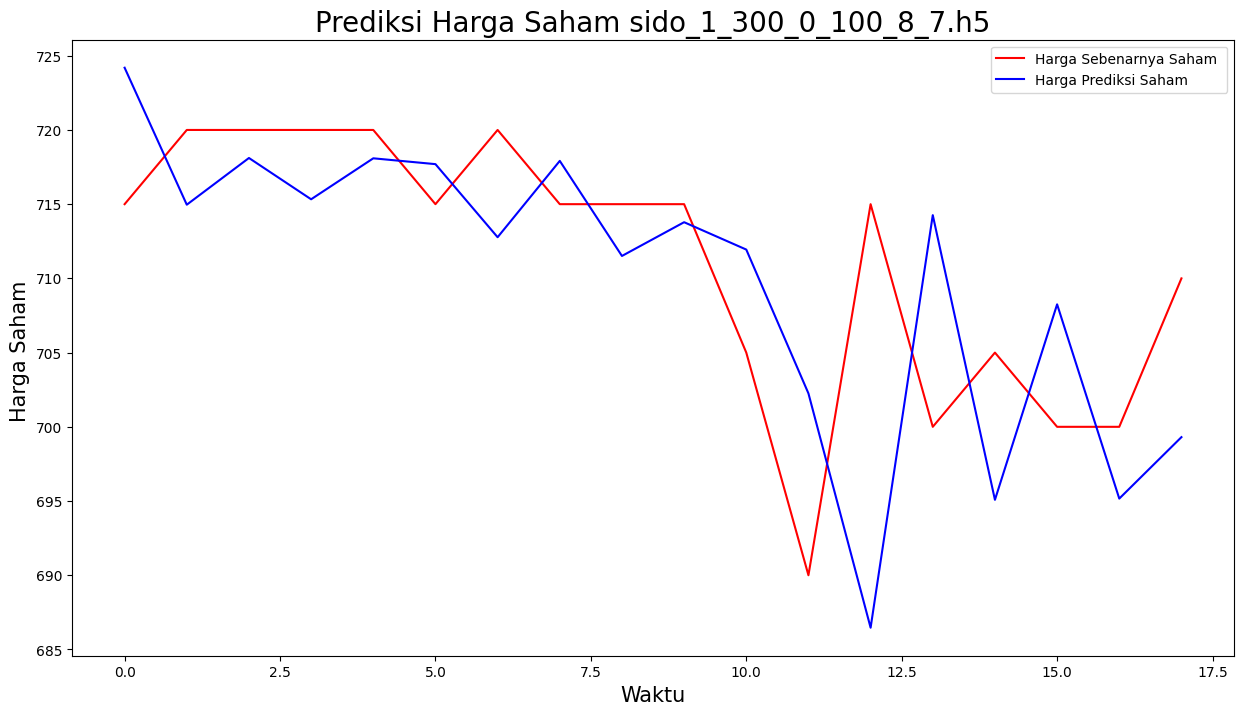

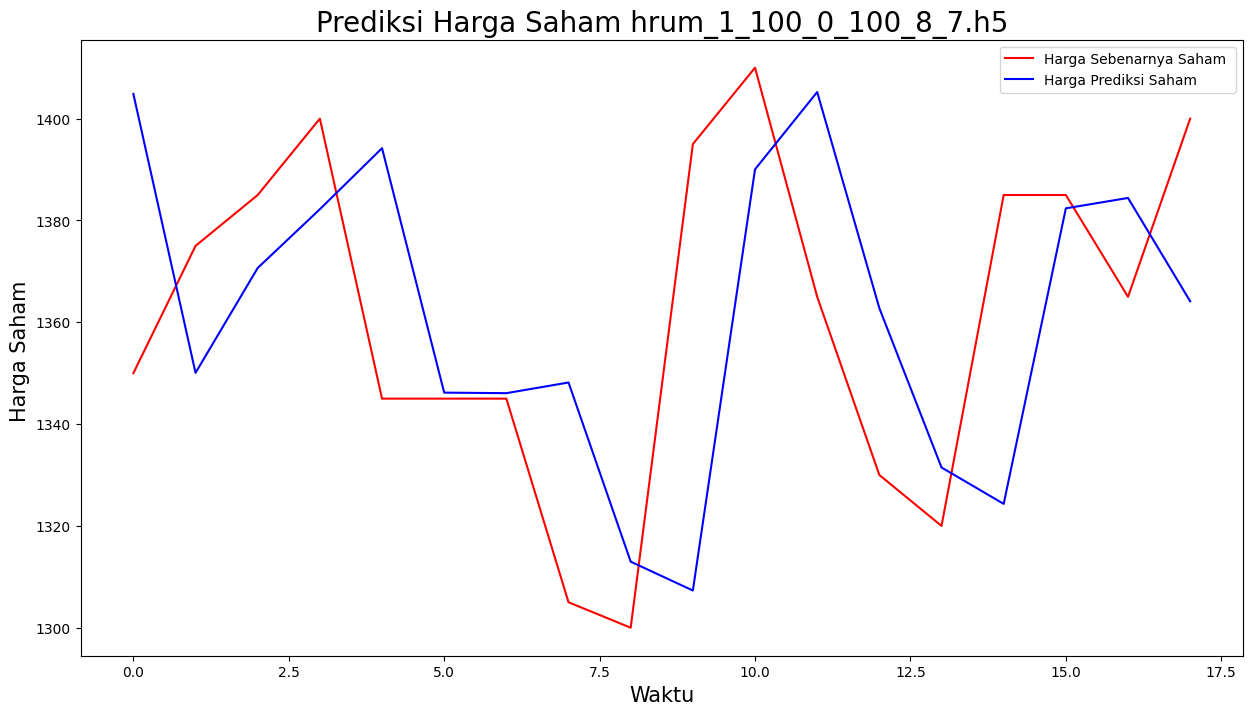

In [14]:
dic_res = {'model_name' : [], 'stock' : [], 'timestep': [], 'mse' : [], 'mae' : [], 'rmse' : [], 'r2' : []}
for i in range(len(list_saham)):
    print(list_saham[i])
    df = list_data[i]
    df = data_clean(df)
    for j in range(len(list_model_saham[i])):
        curr_model = load_model(model_path_dir+"\\"+list_model_saham[i][j])
        dic = curr_model.get_config()
        timestep = dic['layers'][0]['config']['batch_input_shape'][1]
        print(list_model_saham[i][j])
        df_test = df[485:]
        pred_res = predict(df,timestep, curr_model)
        #print(pred_res.shape)
        pred_see = pred_res[560-485:]
        #print(pred_res[:560-485])
        df_see = df['close'][560:].values
        print(len(df_see), len(pred_see))
        #print(pred_see)
        view_result(pred_see, df_see, list_model_saham[i][j])
        #df_see = (df_see['close'].values)
        #print(df_see, pred_see)
        
        mse_ = mean_squared_error(pred_see,df_see)
        mae_ = mean_absolute_error(pred_see, df_see)
        #print(mae_)
        rmse_ = math.sqrt(mse_)
        r2_ = r2_score(pred_see, df_see)
        dic_res['model_name'].append(list_model_saham[i][j])
        dic_res['stock'].append(list_saham[i])
        dic_res['timestep'].append(timestep)
        dic_res['mse'].append(mse_)
        #print(mae_)
        dic_res['mae'].append(mae_)
        dic_res['rmse'].append(rmse_)
        dic_res['r2'].append(r2_)
        #print(pred_res)
        #history_dic = {'accuracy_history' : history.history['accuracy'], 'loss_history':history.history['loss']}
        

In [11]:
dic_res

{'model_name': ['asii_1_100_0.2_100_8.h5',
  'asii_5_200_0_100_8.h5',
  'asii_5_300_0_100_8.h5',
  'amrt_1_100_0.2_200_8.h5',
  'amrt_1_200_0_100_8.h5',
  'amrt_1_300_0_100_8.h5',
  'untr_1_100_0.2_100_8.h5',
  'untr_1_100_0_200_8.h5',
  'unvr_1_100_0.2_100_8.h5',
  'unvr_1_100_0_100_8.h5',
  'mapi_1_100_0_100_8.h5',
  'mapi_1_100_0_200_8.h5',
  'inkp_1_100_0_200_32.h5',
  'inkp_5_200_0_100_8.h5',
  'intp_1_100_0.2_100_32.h5',
  'aces_5_100_0_100_8.h5',
  'aces_5_200_0_100_8.h5',
  'sido_1_200_0_100_8.h5',
  'sido_1_300_0_100_8.h5',
  'hrum_1_100_0_100_8.h5',
  'hrum_1_200_0_100_8.h5'],
 'stock': ['asii',
  'asii',
  'asii',
  'amrt',
  'amrt',
  'amrt',
  'untr',
  'untr',
  'unvr',
  'unvr',
  'mapi',
  'mapi',
  'inkp',
  'inkp',
  'intp',
  'aces',
  'aces',
  'sido',
  'sido',
  'hrum',
  'hrum'],
 'timestep': [30,
  7,
  7,
  7,
  7,
  7,
  30,
  30,
  30,
  30,
  30,
  30,
  7,
  7,
  30,
  30,
  7,
  7,
  7,
  7,
  7],
 'mse': [22168.897084501055,
  19516.769335865974,
  24938.

In [15]:
res_all_model = pd.DataFrame(dic_res2)

In [16]:
len(res_all_model
)

10

In [17]:
layer = []
unit = []
dropout = []
epoch = []
batch_size = []
for value in range(len(res_all_model)):
    curr = res_all_model['model_name'].loc[value]
    split = curr.split('_')
    batch_size.append(split[-1].split('.')[0])
    layer.append(split[1])
    unit.append(split[2])
    dropout.append(split[3])
    epoch.append(split[4])
res_all_model['layer'] = layer
res_all_model['unit'] = unit
res_all_model['dropout'] = dropout
res_all_model['epoch'] = epoch
res_all_model['batch_size'] = batch_size

res_all_model = res_all_model[["stock", "model_name", "layer", "unit", "dropout", "epoch", "batch_size", "timestep", "mse", "mae", "rmse", "r2" ]]

In [18]:
res_all_model.to_csv('result/evaluation_documentation_final_mei.csv')

In [19]:
df_list_model =res_all_model

In [20]:
df_list_model

,stock,model_name,layer,unit,dropout,epoch,batch_size,timestep,mse,mae,rmse,r2
0,asii,asii_1_100_0.2_100_8_30.h5,1,100,0.2,100,30,30,22168.897085,104.134983,148.892233,0.688185
1,amrt,amrt_1_300_0_100_8_7.h5,1,300,0,100,7,7,2609.370154,42.701972,51.081994,-0.470681
2,untr,untr_1_100_0.2_100_8_30.h5,1,100,0.2,100,30,30,196112.227802,298.217882,442.845603,0.696428
3,unvr,unvr_1_100_0.2_100_8_30.h5,1,100,0.2,100,30,30,15968.743862,95.912964,126.367495,0.657442
4,mapi,mapi_1_100_0_200_8_30.h5,1,100,0,200,30,30,3452.409419,47.940247,58.757207,0.295631
5,inkp,inkp_1_100_0_200_32_7.h5,1,100,0,200,7,7,30013.739150,143.175564,173.244738,-0.467581
6,intp,intp_1_100_0.2_100_32_30.h5,1,100,0.2,100,30,30,56651.003854,185.284098,238.014714,0.417589
7,aces,aces_5_100_0_100_8_30.h5,5,100,0,100,30,30,325.938576,15.262631,18.053769,0.705427
8,sido,sido_1_300_0_100_8_7.h5,1,300,0,100,7,7,96.703106,7.551636,9.833774,-0.007632
9,hrum,hrum_1_100_0_100_8_7.h5,1,100,0,100,7,7,1381.755186,29.457011,37.171968,-0.603285


In [22]:
def view_loss_accuracy_history(history,nama):
  #Melihat plot evaluasi model
  plt.figure(figsize=(15,6))
  plt.plot(history.history['loss'])
  plt.plot(history.history['accuracy'])
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Riwayat Train ' + nama)
  plt.savefig('result/'+nama+'_train_history.png')
  #plt.show()

def data_clean(path_data):
  df = pd.read_csv(path_data)
  df = df.drop('Unnamed: 0', axis=1)
  df = df.sort_values('date', ascending=True)
  df.set_index('date', inplace=True)
  return df
  

def predict(df, timesteps, model):
  df_to_train = df[:485] #data train
  df_to_test = df[485:] #data test
  data_total= pd.concat([df_to_train['close'], df_to_test['close']],  axis=0) #digabungin
  #inputnya dimulai dari total data dikurang data test dikurang timestep (jadi dikurang 30 hari sebelum data terbaru dari data train)
  inputs= data_total[len(data_total)-len(df_to_test)-timesteps:].values
  inputs = inputs.reshape(-1,1)
  inputs = sc.fit_transform(inputs)

  x_test = [] #loop dari 30 dengan ukuran data yang 485 - 30 = 455 itu
  for i in range(timesteps, inputs.shape[0]):
    x_test.append(inputs[i-timesteps:i, 0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
  predict = model.predict(x_test)
  predict = sc.inverse_transform(predict)
  return predict


def view_result(pred_res, test_set, model_name):
  plt.figure(figsize=(15,8))
  plt.plot(test_set['close'], color='red', label='Harga Sebenarnya Saham ')
  plt.plot(pred_res, color='blue', label='Harga Prediksi Saham ')
  plt.title('Prediksi Harga Saham '+model_name, fontsize=20)
  plt.xlabel('Waktu', fontsize=15)
  plt.ylabel('Harga Saham ', fontsize=15)
  plt.legend()
  plt.savefig('model_check/'+model_name+'_train_history.png')
  #plt.show()

asii
asii_1_100_0.2_100_8_30.h5
3/3 [==============================] - 1s 28ms/step
amrt
amrt_1_300_0_100_8_7.h5
3/3 [==============================] - 1s 21ms/step
untr
untr_1_100_0.2_100_8_30.h5
3/3 [==============================] - 1s 28ms/step
unvr
unvr_1_100_0.2_100_8_30.h5
3/3 [==============================] - 2s 28ms/step
mapi
mapi_1_100_0_200_8_30.h5
3/3 [==============================] - 1s 24ms/step
inkp
inkp_1_100_0_200_32_7.h5
3/3 [==============================] - 1s 9ms/step
intp
intp_1_100_0.2_100_32_30.h5
3/3 [==============================] - 1s 24ms/step
aces
aces_5_100_0_100_8_30.h5
3/3 [==============================] - 3s 62ms/step
sido
sido_1_300_0_100_8_7.h5
3/3 [==============================] - 1s 22ms/step
hrum
hrum_1_100_0_100_8_7.h5
3/3 [==============================] - 1s 9ms/step


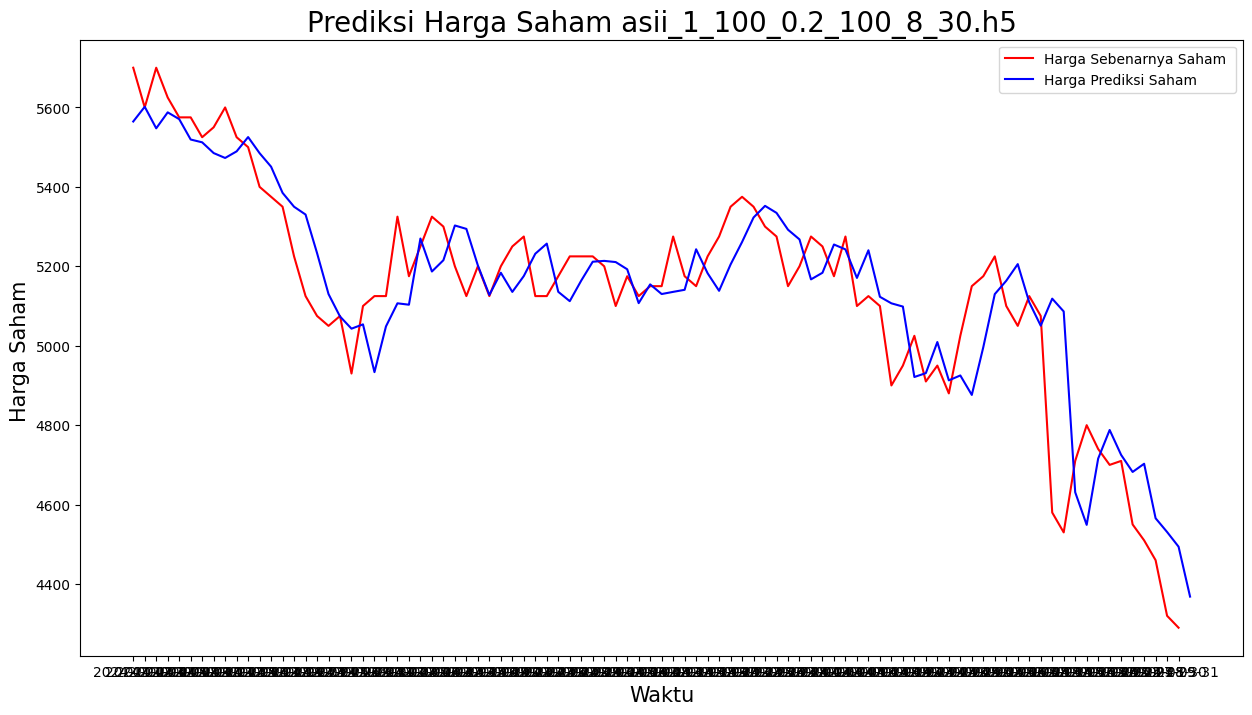

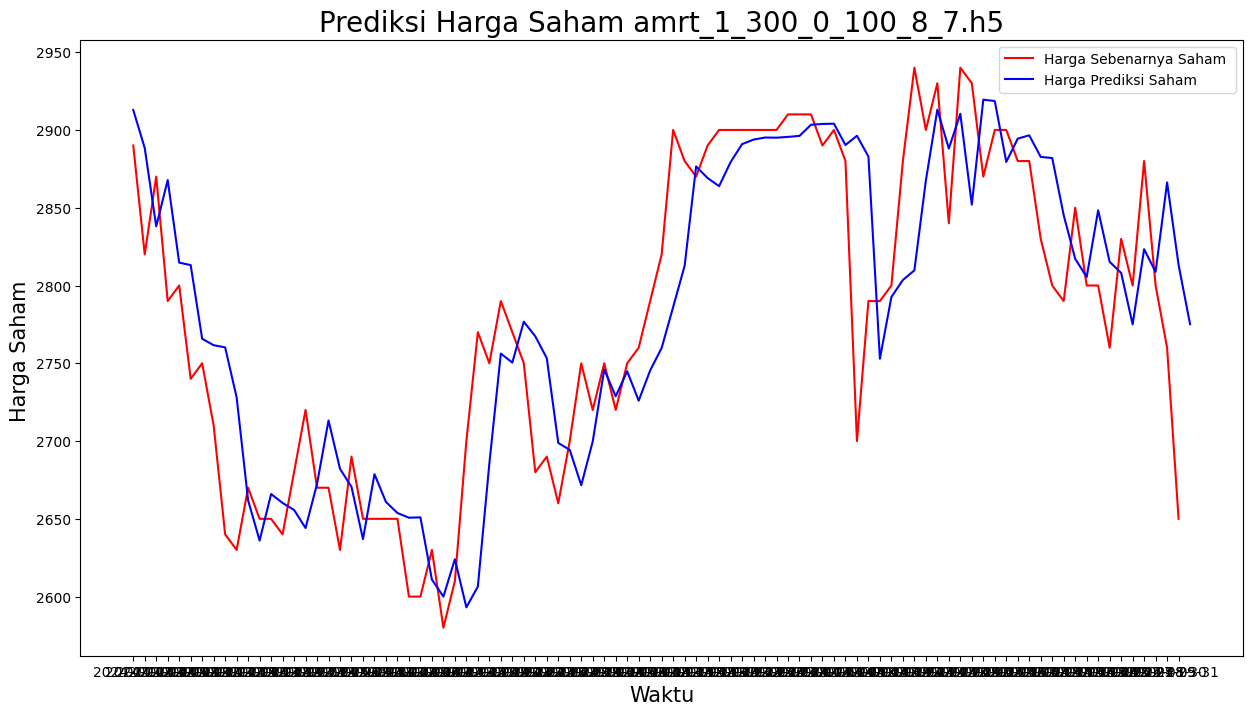

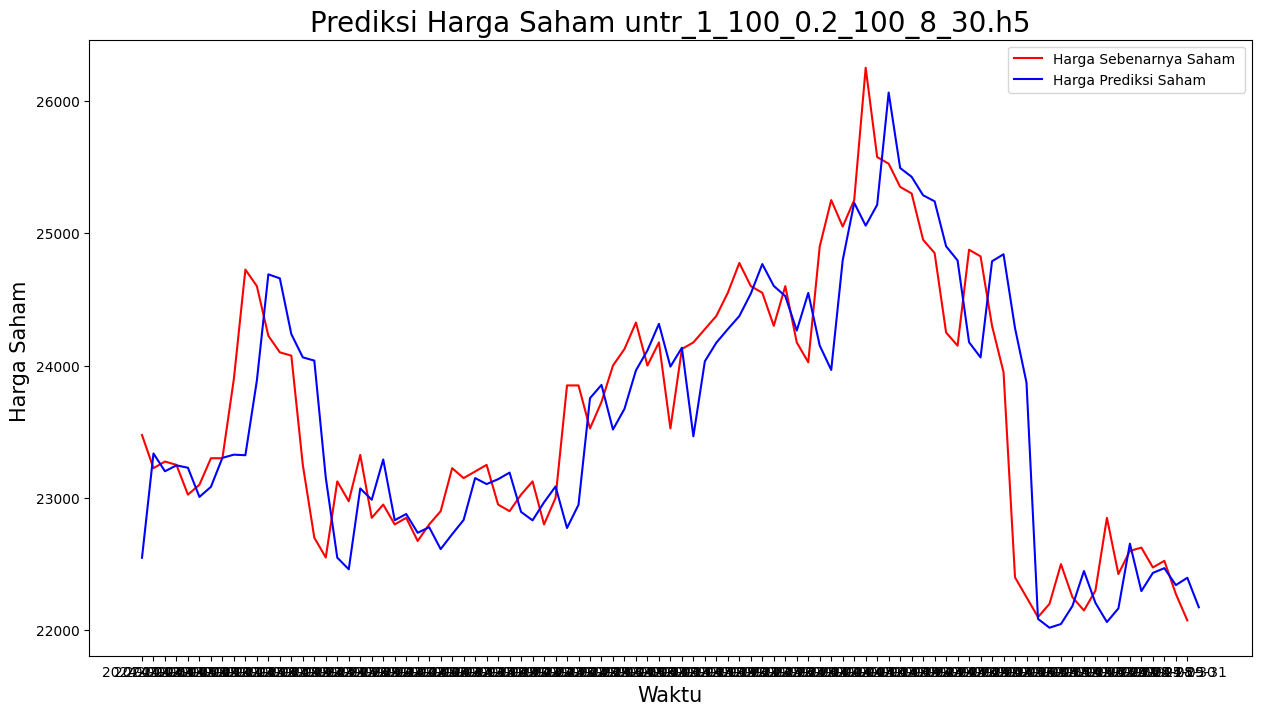

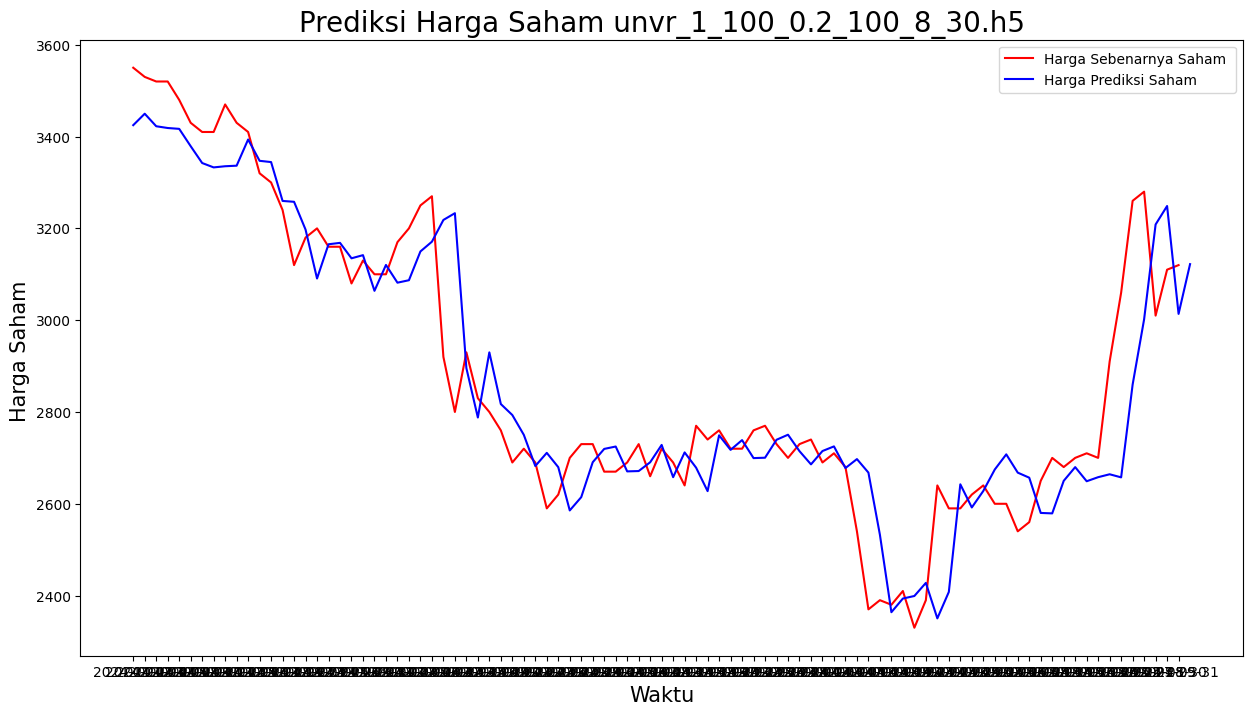

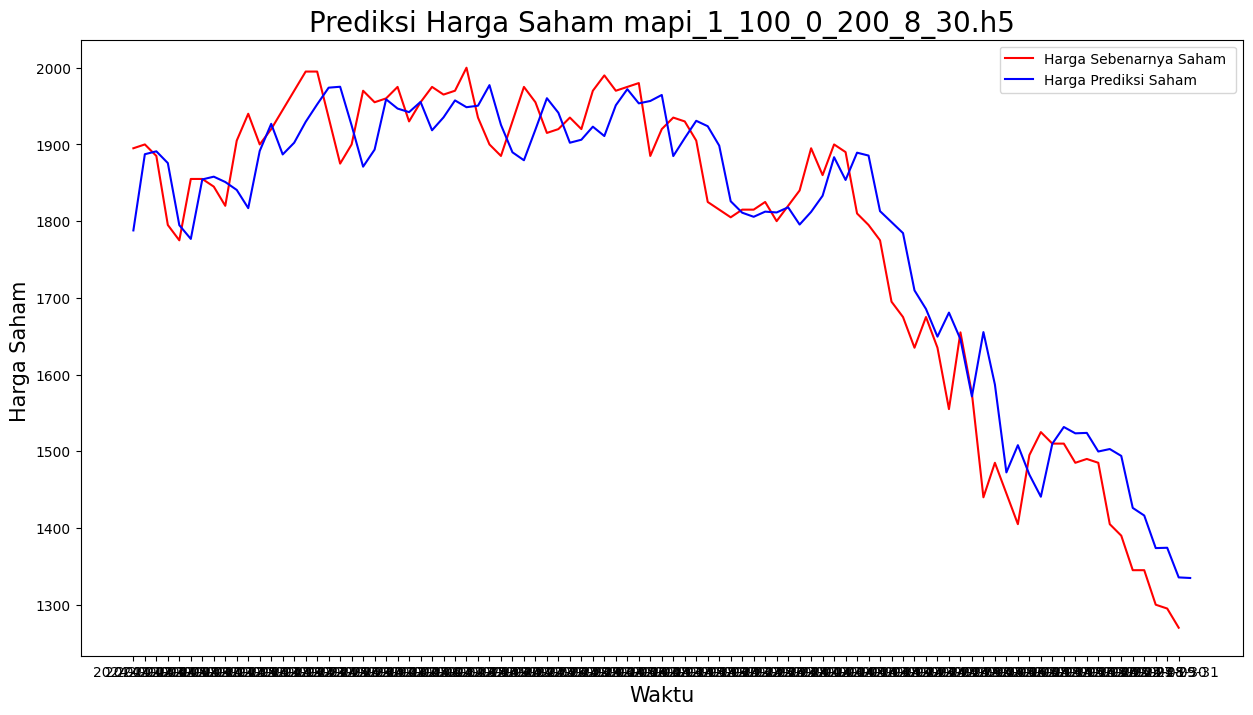

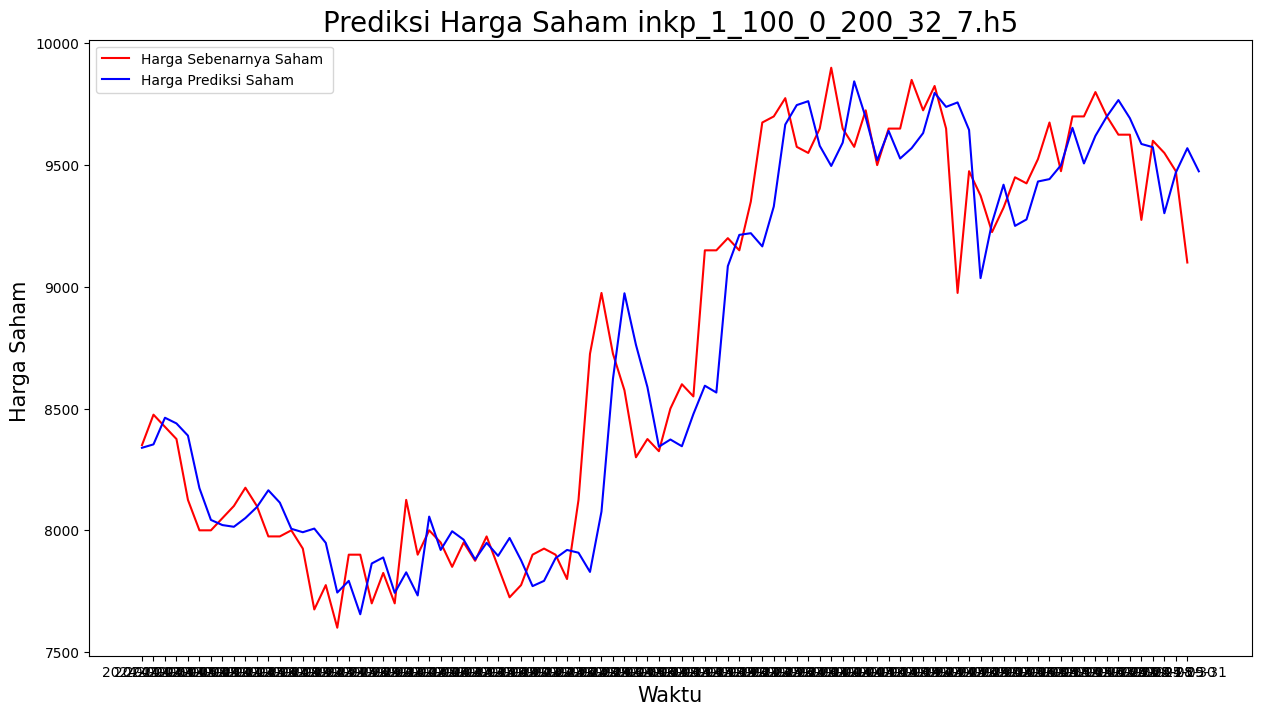

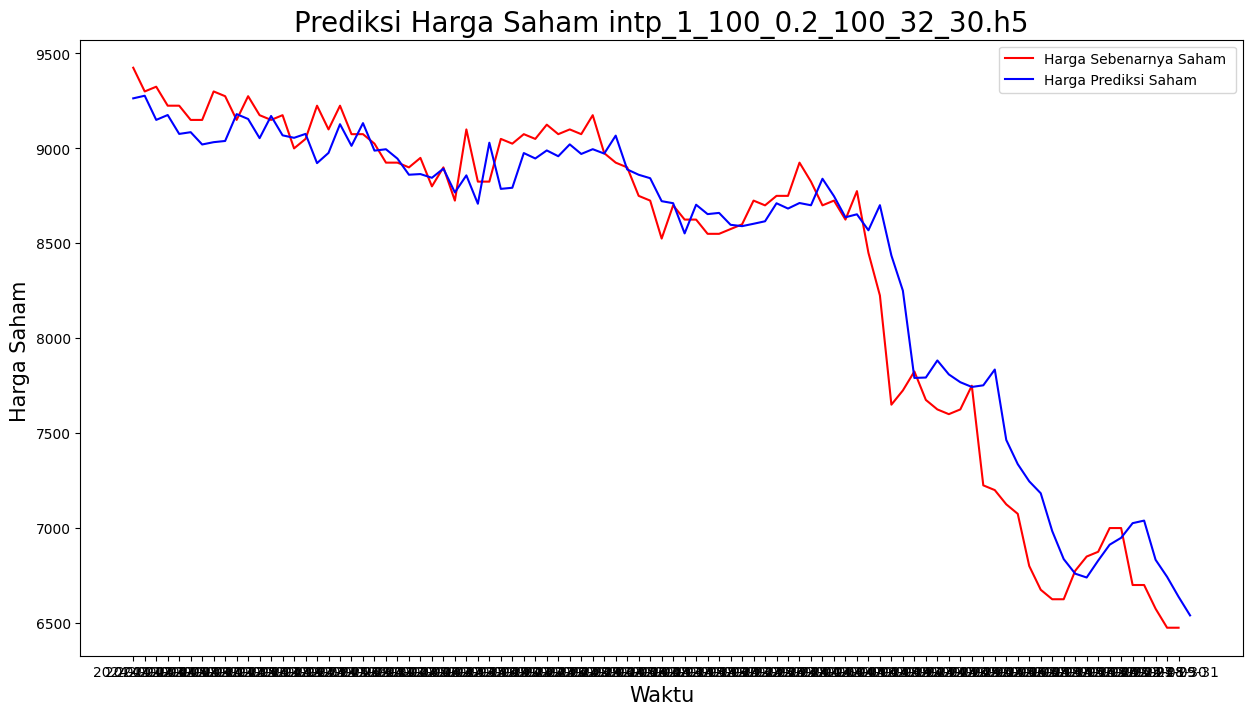

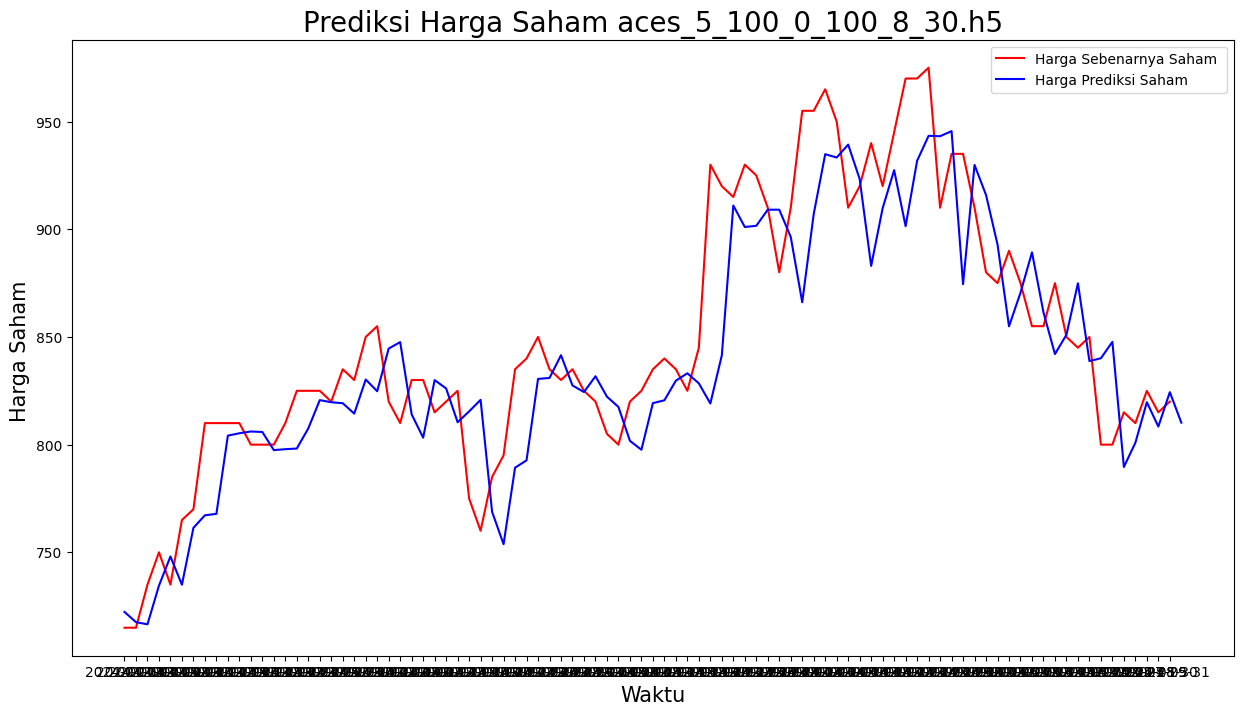

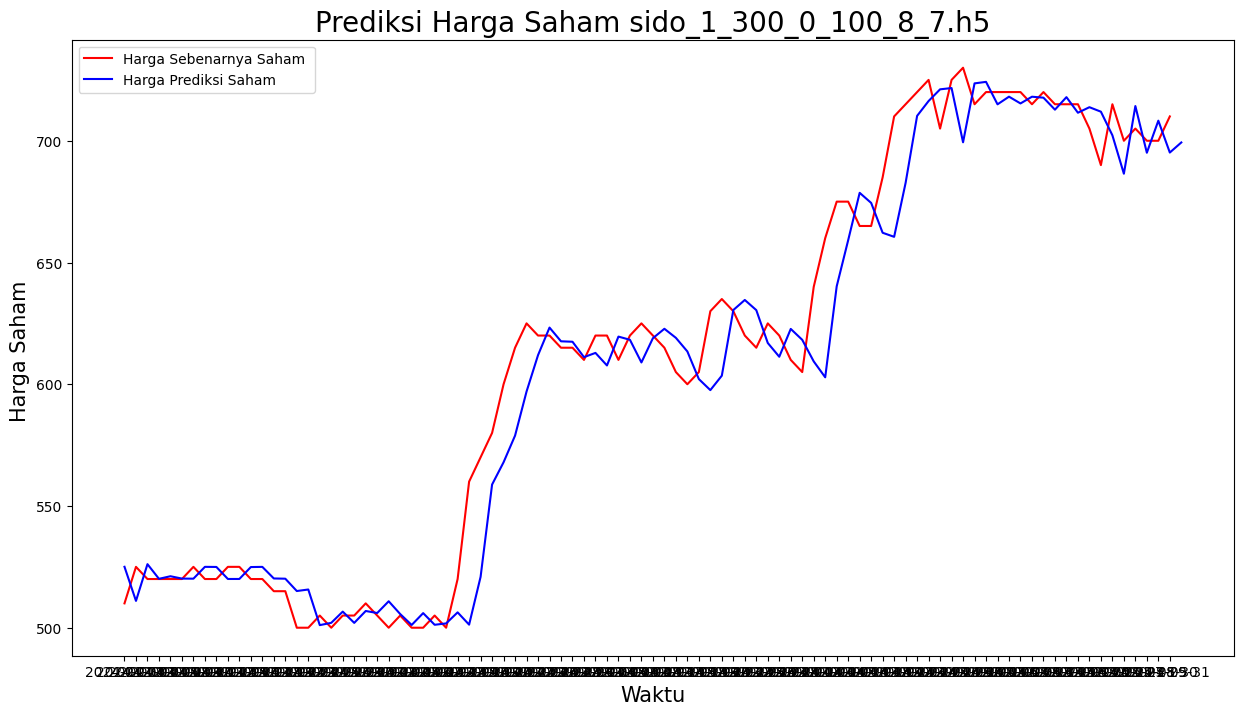

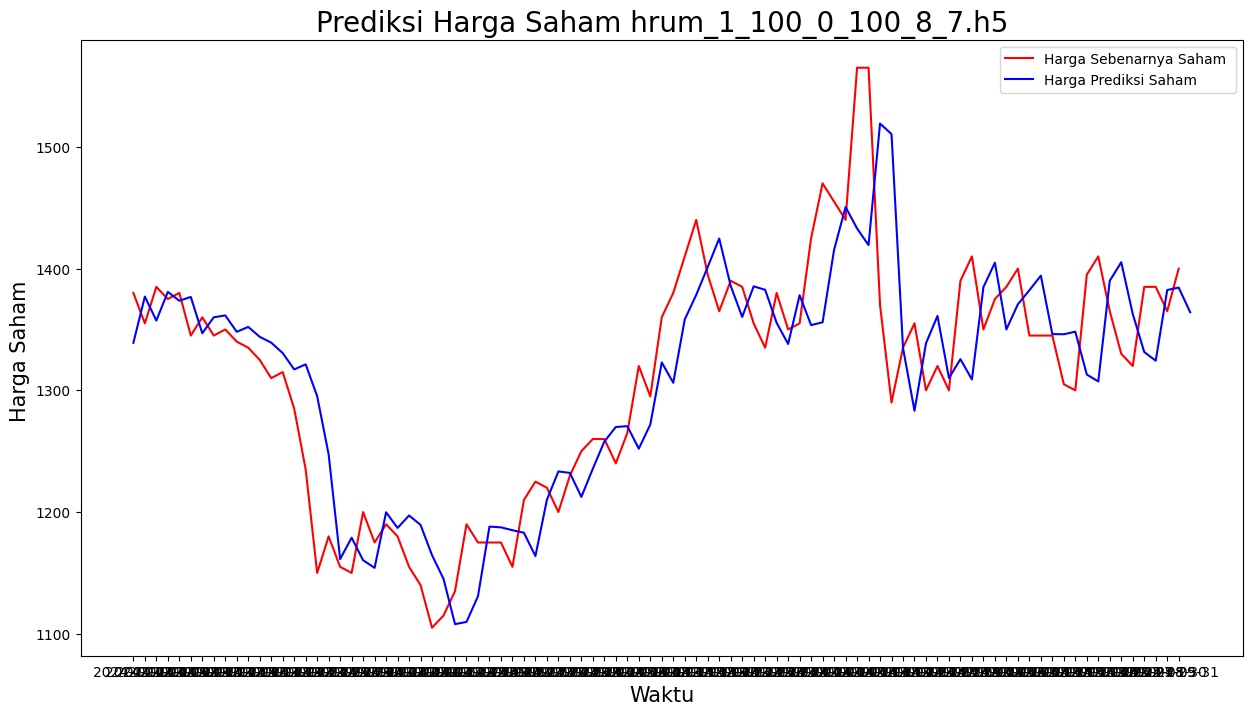

In [23]:
dic_res_all = {'model_name' : [], 'stock' : [], 'timestep': [], 'mse' : [], 'mae' : [], 'rmse' : [], 'r2' : []}
for i in range(len(list_saham)):
    print(list_saham[i])
    df = list_data[i]
    df = data_clean(df)
    for j in range(len(list_model_saham[i])):
        curr_model = load_model(model_path_dir+"\\"+list_model_saham[i][j])
        dic = curr_model.get_config()
        timestep = dic['layers'][0]['config']['batch_input_shape'][1]
        print(list_model_saham[i][j])
        df_test = df[485:]
        pred_res = predict(df,timestep, curr_model)
        view_result(pred_res, df_test, list_model_saham[i][j])
        df_test = (df_test['close'].values)
        mse_ = mean_squared_error(pred_res,df_test)
        mae_ = mean_absolute_error(pred_res, df_test)
        #print(mae_)
        rmse_ = math.sqrt(mse_)
        r2_ = r2_score(pred_res, df_test)
        dic_res_all['model_name'].append(list_model_saham[i][j])
        dic_res_all['stock'].append(list_saham[i])
        dic_res_all['timestep'].append(timestep)
        dic_res_all['mse'].append(mse_)
        #print(mae_)
        dic_res_all['mae'].append(mae_)
        dic_res_all['rmse'].append(rmse_)
        dic_res_all['r2'].append(r2_)
        #print(pred_res)
        #history_dic = {'accuracy_history' : history.history['accuracy'], 'loss_history':history.history['loss']}
        

In [24]:
list_res_all = pd.DataFrame(dic_res_all)

In [25]:
layer = []
unit = []
dropout = []
epoch = []
batch_size = []
for value in range(len(list_res_all)):
    curr = list_res_all['model_name'].loc[value]
    split = curr.split('_')
    batch_size.append(split[-1].split('.')[0])
    layer.append(split[1])
    unit.append(split[2])
    dropout.append(split[3])
    epoch.append(split[4])
list_res_all['layer'] = layer
list_res_all['unit'] = unit
list_res_all['dropout'] = dropout
list_res_all['epoch'] = epoch
list_res_all['batch_size'] = batch_size

list_res_all = list_res_all[["stock", "model_name", "layer", "unit", "dropout", "epoch", "batch_size", "timestep", "mse", "mae", "rmse", "r2" ]]

In [26]:
list_res_all

,stock,model_name,layer,unit,dropout,epoch,batch_size,timestep,mse,mae,rmse,r2
0,asii,asii_1_100_0.2_100_8_30.h5,1,100,0.2,100,30,30,9775.456035,72.582751,98.870906,0.849240
1,amrt,amrt_1_300_0_100_8_7.h5,1,300,0,100,7,7,2118.542900,34.468771,46.027632,0.769102
2,untr,untr_1_100_0.2_100_8_30.h5,1,100,0.2,100,30,30,150001.961175,275.001134,387.300866,0.841646
3,unvr,unvr_1_100_0.2_100_8_30.h5,1,100,0.2,100,30,30,7991.925865,65.740568,89.397572,0.911869
4,mapi,mapi_1_100_0_200_8_30.h5,1,100,0,200,30,30,2205.399238,37.313196,46.961678,0.933229
5,inkp,inkp_1_100_0_200_32_7.h5,1,100,0,200,7,7,38612.168364,145.453881,196.499792,0.931529
6,intp,intp_1_100_0.2_100_32_30.h5,1,100,0.2,100,30,30,28788.164977,126.397587,169.670755,0.954276
7,aces,aces_5_100_0_100_8_30.h5,5,100,0,100,30,30,516.984978,16.893649,22.737304,0.831889
8,sido,sido_1_300_0_100_8_7.h5,1,300,0,100,7,7,130.428907,8.113440,11.420548,0.979039
9,hrum,hrum_1_100_0_100_8_7.h5,1,100,0,100,7,7,1561.141423,29.524639,39.511282,0.805080


In [17]:
df_model_for_asii = df_list_model.loc[df_list_model['stock'] == 'asii']
print(df_model_for_asii)
print(df_model_for_asii[['mae']].idxmin())
print(df_model_for_asii[['mse']].idxmin())
print(df_model_for_asii[['rmse']].idxmin()) 
print(df_model_for_asii[['r2']].idxmax())

                model_name stock  timestep           mse         mae  \
0  asii_1_100_0.2_100_8.h5  asii        30  22168.897085  104.134983   
1    asii_5_200_0_100_8.h5  asii         7  19516.769336   93.710097   
2    asii_5_300_0_100_8.h5  asii         7  24938.200680  114.105740   

         rmse        r2  
0  148.892233  0.688185  
1  139.702431  0.735760  
2  157.918335  0.642498  
mae    1
dtype: int64
mse    1
dtype: int64
rmse    1
dtype: int64
r2    1
dtype: int64


In [18]:
df_model_for_amrt = df_list_model.loc[df_list_model['stock'] == 'amrt']
print(df_model_for_amrt)
print(df_model_for_amrt[['mae']].idxmin())
print(df_model_for_amrt[['mse']].idxmin())
print(df_model_for_amrt[['rmse']].idxmin()) 
print(df_model_for_amrt[['r2']].idxmax())

                model_name stock  timestep          mse        mae       rmse  \
3  amrt_1_100_0.2_200_8.h5  amrt         7  2841.544657  45.389771  53.306141   
4    amrt_1_200_0_100_8.h5  amrt         7  3294.879727  49.327610  57.401043   
5    amrt_1_300_0_100_8.h5  amrt         7  2609.370154  42.701972  51.081994   

         r2  
3 -0.547596  
4 -0.693252  
5 -0.470681  
mae    5
dtype: int64
mse    5
dtype: int64
rmse    5
dtype: int64
r2    5
dtype: int64


In [19]:
df_model_for_untr = df_list_model.loc[df_list_model['stock'] == 'untr']
print(df_model_for_untr)
print(df_model_for_untr[['mae']].idxmin())
print(df_model_for_untr[['mse']].idxmin())
print(df_model_for_untr[['rmse']].idxmin()) 
print(df_model_for_untr[['r2']].idxmax())

                model_name stock  timestep            mse         mae  \
6  untr_1_100_0.2_100_8.h5  untr        30  196112.227802  298.217882   
7    untr_1_100_0_200_8.h5  untr        30  200839.031754  304.785590   

         rmse        r2  
6  442.845603  0.696428  
7  448.150680  0.666399  
mae    6
dtype: int64
mse    6
dtype: int64
rmse    6
dtype: int64
r2    6
dtype: int64


In [20]:
df_model_for_unvr = df_list_model.loc[df_list_model['stock'] == 'unvr']
print(df_model_for_unvr)
print(df_model_for_unvr[['mae']].idxmin())
print(df_model_for_unvr[['mse']].idxmin())
print(df_model_for_unvr[['rmse']].idxmin()) 
print(df_model_for_unvr[['r2']].idxmax())

                model_name stock  timestep           mse        mae  \
8  unvr_1_100_0.2_100_8.h5  unvr        30  15968.743862  95.912964   
9    unvr_1_100_0_100_8.h5  unvr        30  10733.678881  67.621840   

         rmse        r2  
8  126.367495  0.657442  
9  103.603469  0.818217  
mae    9
dtype: int64
mse    9
dtype: int64
rmse    9
dtype: int64
r2    9
dtype: int64


In [21]:
df_model_for_mapi = df_list_model.loc[df_list_model['stock'] == 'mapi']
print(df_model_for_mapi)
print(df_model_for_mapi[['mae']].idxmin())
print(df_model_for_mapi[['mse']].idxmin())
print(df_model_for_mapi[['rmse']].idxmin()) 
print(df_model_for_mapi[['r2']].idxmax())

               model_name stock  timestep          mse        mae       rmse  \
10  mapi_1_100_0_100_8.h5  mapi        30  4213.023323  53.815898  64.907806   
11  mapi_1_100_0_200_8.h5  mapi        30  3452.409419  47.940247  58.757207   

          r2  
10 -0.016212  
11  0.295631  
mae    11
dtype: int64
mse    11
dtype: int64
rmse    11
dtype: int64
r2    11
dtype: int64


In [22]:
df_model_for_inkp = df_list_model.loc[df_list_model['stock'] == 'inkp']
print(df_model_for_inkp)
print(df_model_for_inkp[['mae']].idxmin())
print(df_model_for_inkp[['mse']].idxmin())
print(df_model_for_inkp[['rmse']].idxmin()) 
print(df_model_for_inkp[['r2']].idxmax())

                model_name stock  timestep           mse         mae  \
12  inkp_1_100_0_200_32.h5  inkp         7  30013.739150  143.175564   
13   inkp_5_200_0_100_8.h5  inkp         7  32007.903174  140.445150   

          rmse        r2  
12  173.244738 -0.467581  
13  178.907527 -1.037219  
mae    13
dtype: int64
mse    12
dtype: int64
rmse    12
dtype: int64
r2    12
dtype: int64


In [24]:
df_model_for_intp = df_list_model.loc[df_list_model['stock'] == 'intp']
print(df_model_for_intp)
print(df_model_for_intp[['mae']].idxmin())
print(df_model_for_intp[['mse']].idxmin())
print(df_model_for_intp[['rmse']].idxmin()) 
print(df_model_for_intp[['r2']].idxmax())

                  model_name stock  timestep           mse         mae  \
14  intp_1_100_0.2_100_32.h5  intp        30  56651.003854  185.284098   

          rmse        r2  
14  238.014714  0.417589  
mae    14
dtype: int64
mse    14
dtype: int64
rmse    14
dtype: int64
r2    14
dtype: int64


In [29]:
df_model_for_aces = df_list_model.loc[df_list_model['stock'] == 'aces']
print(df_model_for_aces)
print(df_model_for_aces[['mae']].idxmin())
print(df_model_for_aces[['mse']].idxmin())
print(df_model_for_aces[['rmse']].idxmin()) 
print(df_model_for_aces[['r2']].idxmax())

               model_name stock  timestep         mse        mae       rmse  \
15  aces_5_100_0_100_8.h5  aces        30  325.938576  15.262631  18.053769   
16  aces_5_200_0_100_8.h5  aces         7  462.097547  16.857029  21.496454   

          r2  
15  0.705427  
16  0.688524  
mae    15
dtype: int64
mse    15
dtype: int64
rmse    15
dtype: int64
r2    15
dtype: int64


In [26]:
df_model_for_sido = df_list_model.loc[df_list_model['stock'] == 'sido']
print(df_model_for_sido)
print(df_model_for_sido[['mae']].idxmin())
print(df_model_for_sido[['mse']].idxmin())
print(df_model_for_sido[['rmse']].idxmin()) 
print(df_model_for_sido[['r2']].idxmax())

               model_name stock  timestep         mse       mae       rmse  \
17  sido_1_200_0_100_8.h5  sido         7  113.005922  8.057112  10.630424   
18  sido_1_300_0_100_8.h5  sido         7   96.703106  7.551636   9.833774   

          r2  
17 -0.148161  
18 -0.007632  
mae    18
dtype: int64
mse    18
dtype: int64
rmse    18
dtype: int64
r2    18
dtype: int64


In [27]:
df_model_for_hrum = df_list_model.loc[df_list_model['stock'] == 'hrum']
print(df_model_for_hrum)
print(df_model_for_hrum[['mae']].idxmin())
print(df_model_for_hrum[['mse']].idxmin())
print(df_model_for_hrum[['rmse']].idxmin()) 
print(df_model_for_hrum[['r2']].idxmax())

               model_name stock  timestep          mse        mae       rmse  \
19  hrum_1_100_0_100_8.h5  hrum         7  1381.755186  29.457011  37.171968   
20  hrum_1_200_0_100_8.h5  hrum         7  1897.384395  37.408054  43.558976   

          r2  
19 -0.603285  
20 -0.681290  
mae    19
dtype: int64
mse    19
dtype: int64
rmse    19
dtype: int64
r2    19
dtype: int64
